<a href="https://colab.research.google.com/github/Kausthub8/Term-Deposit-Analysis-Using-AutoML/blob/master/TDAML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

In [3]:
client_inf = pd.read_csv('bank.csv')
client_inf

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
client_inf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
!pip install h2o

     |████████████████████████████████| 128.3MB 70kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.4-py2.py3-none-any.whl size=128397038 sha256=badf1f6dfaf7e3b0af6dcd9e16288067dc1f7161b4745bbb2e85ff20d55ccf78
  Stored in directory: /root/.cache/pip/wheels/ad/bd/cc/0a8c7dffc4772df0bbfae4c1c7a9d64525fcd3ada9694dd8c3
Successfully built h2o


In [9]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgcuju8sd
  JVM stdout: /tmp/tmpgcuju8sd/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgcuju8sd/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_u5ddky
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [11]:
h2o_df = h2o.H2OFrame(client_inf) 

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
h2o_df.describe()

Rows:11162
Cols:17




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-6847.0,,,,1.0,,2.0,1.0,-1.0,0.0,,
mean,41.2319476796274,,,,,1528.5385235620836,,,,15.658036194230426,,371.9938183121324,2.508421429851285,51.33040673714394,0.8325568894463402,,
maxs,95.0,,,,,81204.0,,,,31.0,,3881.0,63.0,854.0,58.0,,
sigma,11.91336919221552,,,,,3225.413325946149,,,,8.420739541006462,,347.12838571630687,2.7220771816614824,108.75828197197717,2.292007218670508,,
zeros,0,,,,,774,,,,0,,0,0,0,8324,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,yes


In [14]:
train, test  = h2o_df.split_frame(ratios=[0.50])
x =  train.columns
y = 'deposit'
x.remove(y)

In [15]:
from h2o.automl import H2OAutoML


In [17]:
client_inf.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [18]:
mla = H2OAutoML(max_runtime_secs=800, balance_classes=True, stopping_metric='logloss', project_name='Final', seed=1)
%time mla.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 38.1 s, sys: 1.03 s, total: 39.1 s
Wall time: 12min 10s


In [19]:
lebo = mla.leaderboard
lebo.head(rows = lebo.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200618_084430,0.925674,0.336577,0.895422,0.131275,0.321105,0.103108
XGBoost_grid__1_AutoML_20200618_084430_model_12,0.924104,0.337904,0.893224,0.137663,0.322912,0.104272
StackedEnsemble_BestOfFamily_AutoML_20200618_084430,0.923905,0.340235,0.893047,0.13433,0.322794,0.104196
GBM_5_AutoML_20200618_084430,0.923806,0.340152,0.891592,0.136432,0.324404,0.105238
GBM_grid__1_AutoML_20200618_084430_model_3,0.923619,0.340842,0.89223,0.136495,0.32431,0.105177
XGBoost_grid__1_AutoML_20200618_084430_model_5,0.923197,0.340713,0.891375,0.137847,0.324507,0.105305
XGBoost_grid__1_AutoML_20200618_084430_model_23,0.922789,0.34413,0.892727,0.134984,0.324554,0.105335
XGBoost_grid__1_AutoML_20200618_084430_model_16,0.922753,0.343876,0.894745,0.139575,0.326001,0.106277
GBM_3_AutoML_20200618_084430,0.922656,0.342054,0.888115,0.136568,0.324517,0.105311
GBM_grid__1_AutoML_20200618_084430_model_5,0.922596,0.340242,0.889037,0.137236,0.324384,0.105225


In [20]:
lm = mla.leader
metalearner = h2o.get_model(lm.metalearner()['name'])

In [21]:
metalearner.varimp

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  metalearner_AUTO_StackedEnsemble_AllModels_AutoML_20200618_084430


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 3.111E-4 )",48,16,5,levelone_training_StackedEnsemble_AllModels_AutoML_20200618_084430




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10202346331724818
RMSE: 0.31941111958923435
LogLoss: 0.33330083315108117
Null degrees of freedom: 5666
Residual degrees of freedom: 5650
Null deviance: 7846.547595332923
Residual deviance: 3777.631642934354
AIC: 3811.631642934354
AUC: 0.9271307461494794
AUCPR: 0.8967948451788222
Gini: 0.8542614922989589

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4239400088239627: 


,,no,yes,Error,Rate
0,no,2442.0,508.0,0.1722,(508.0/2950.0)
1,yes,243.0,2474.0,0.0894,(243.0/2717.0)
2,Total,2685.0,2982.0,0.1325,(751.0/5667.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.423940,0.868222,226.0
1,max f2,0.133530,0.921584,313.0
2,max f0point5,0.634650,0.852921,170.0
3,max accuracy,0.423940,0.867478,226.0
4,max precision,0.954655,1.000000,0.0
5,max recall,0.034054,1.000000,376.0
6,max specificity,0.954655,1.000000,0.0
7,max absolute_mcc,0.423940,0.738751,226.0
8,max min_per_class_accuracy,0.593195,0.860140,181.0
9,max mean_per_class_accuracy,0.423940,0.869180,226.0



Gains/Lift Table: Avg response rate: 47.94 %, avg score: 47.94 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010058,0.950408,2.012572,2.012572,0.964912,0.952424,0.964912,0.952424,0.020243,0.020243,101.257192,101.257192
1,,2,0.020116,0.947737,1.975980,1.994276,0.947368,0.949014,0.956140,0.950719,0.019875,0.040118,97.597970,99.427581
2,,3,0.029998,0.945110,2.048511,2.012141,0.982143,0.946461,0.964706,0.949316,0.020243,0.060361,104.851070,101.214142
3,,4,0.040056,0.942146,2.049164,2.021438,0.982456,0.943668,0.969163,0.947898,0.020611,0.080972,104.916413,102.143787
4,,5,0.050115,0.939714,1.975980,2.012314,0.947368,0.940832,0.964789,0.946480,0.019875,0.100847,97.597970,101.231422
5,,6,0.100053,0.928260,1.923613,1.968042,0.922261,0.933922,0.943563,0.940212,0.096062,0.196908,92.361275,96.804170
6,,7,0.149991,0.917029,1.916243,1.950796,0.918728,0.922671,0.935294,0.934372,0.095694,0.292602,91.624258,95.079564
7,,8,0.200106,0.903128,1.828709,1.920220,0.876761,0.910314,0.920635,0.928347,0.091645,0.384247,82.870891,92.022013
8,,9,0.299982,0.862716,1.783580,1.874727,0.855124,0.884407,0.898824,0.913718,0.178138,0.562385,78.357963,87.472688
9,,10,0.400035,0.779205,1.695827,1.829982,0.813051,0.825486,0.877371,0.891650,0.169672,0.732057,69.582659,82.998208




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.10310831274286979
RMSE: 0.3211048313913539
LogLoss: 0.3365765749612439
Null degrees of freedom: 5666
Residual degrees of freedom: 5648
Null deviance: 7847.687974678827
Residual deviance: 3814.7589006107382
AIC: 3852.7589006107382
AUC: 0.9256739424714447
AUCPR: 0.8954218339117324
Gini: 0.8513478849428895

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.44178788147116377: 


,,no,yes,Error,Rate
0,no,2448.0,502.0,0.1702,(502.0/2950.0)
1,yes,251.0,2466.0,0.0924,(251.0/2717.0)
2,Total,2699.0,2968.0,0.1329,(753.0/5667.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.441788,0.867546,221.0
1,max f2,0.132137,0.921611,313.0
2,max f0point5,0.609348,0.850923,177.0
3,max accuracy,0.441788,0.867125,221.0
4,max precision,0.955069,1.000000,0.0
5,max recall,0.031862,1.000000,380.0
6,max specificity,0.955069,1.000000,0.0
7,max absolute_mcc,0.441788,0.737657,221.0
8,max min_per_class_accuracy,0.589758,0.857932,182.0
9,max mean_per_class_accuracy,0.441788,0.868725,221.0



Gains/Lift Table: Avg response rate: 47.94 %, avg score: 47.93 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010058,0.950161,2.012572,2.012572,0.964912,0.952739,0.964912,0.952739,0.020243,0.020243,101.257192,101.257192
1,,2,0.020116,0.947783,1.975980,1.994276,0.947368,0.948892,0.956140,0.950816,0.019875,0.040118,97.597970,99.427581
2,,3,0.029998,0.945361,2.085756,2.024411,1.000000,0.946589,0.970588,0.949423,0.020611,0.060729,108.575635,102.441057
3,,4,0.040056,0.942265,2.012572,2.021438,0.964912,0.943771,0.969163,0.948004,0.020243,0.080972,101.257192,102.143787
4,,5,0.050115,0.939384,1.939387,2.004970,0.929825,0.940987,0.961268,0.946596,0.019507,0.100478,93.938748,100.497001
5,,6,0.100053,0.928432,1.923613,1.964363,0.922261,0.933842,0.941799,0.940230,0.096062,0.196540,92.361275,96.436312
6,,7,0.149991,0.917016,1.908872,1.945888,0.915194,0.922932,0.932941,0.934471,0.095326,0.291866,90.887242,94.588798
7,,8,0.200106,0.903388,1.843397,1.920220,0.883803,0.910669,0.920635,0.928510,0.092381,0.384247,84.339734,92.022013
8,,9,0.299982,0.862628,1.761469,1.867365,0.844523,0.884690,0.895294,0.913920,0.175929,0.560177,76.146914,86.736539
9,,10,0.400035,0.778064,1.688469,1.822622,0.809524,0.825252,0.873842,0.891743,0.168936,0.729113,68.846943,82.262167




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.8681464,0.0059144683,0.86445016,0.8602058,0.86856127,0.8735733,0.87394166
1,auc,0.9258202,0.002996344,0.92819697,0.9242924,0.92245394,0.92967004,0.92448753
2,aucpr,0.89563864,0.005275408,0.888296,0.89484805,0.9023234,0.89871293,0.89401287
3,err,0.13185355,0.0059144683,0.13554987,0.13979417,0.13143872,0.1264267,0.12605833
4,err_count,149.6,11.674759,159.0,163.0,148.0,144.0,134.0
5,f0point5,0.84109473,0.009187963,0.8338794,0.8288,0.84889644,0.8453608,0.848537
6,f1,0.87054837,0.006589262,0.8649108,0.86405337,0.87108016,0.87234044,0.88035715
7,f2,0.902198,0.007604724,0.898341,0.902439,0.89445436,0.9010989,0.91465676
8,lift_top_group,1.9803993,0.15164334,1.7708334,2.0933573,1.880085,2.132959,2.024762
9,logloss,0.33651087,0.0076409797,0.33563203,0.3424595,0.34569895,0.3270033,0.33176062



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective
0,,2020-06-18 08:56:36,0.000 sec,0,3923.273798,0.692302
1,,2020-06-18 08:56:36,0.034 sec,1,2062.133592,0.364672
2,,2020-06-18 08:56:37,0.053 sec,2,1907.957022,0.338003
3,,2020-06-18 08:56:37,0.071 sec,3,1890.663179,0.335359
4,,2020-06-18 08:56:37,0.091 sec,4,1888.943806,0.335234
5,,2020-06-18 08:56:37,0.108 sec,5,1888.815821,0.335232


<bound method ModelBase.varimp of >

In [22]:
model = h2o.get_model('StackedEnsemble_AllModels_AutoML_20200618_084430')

In [25]:
model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.10702813797661445
RMSE: 0.32715155200092577
LogLoss: 0.34390590841646396
Null degrees of freedom: 5494
Residual degrees of freedom: 5478
Null deviance: 7598.10529260831
Residual deviance: 3779.5259334969396
AIC: 3813.5259334969396
AUC: 0.9244877198004351
AUCPR: 0.8926066765275396
Gini: 0.8489754396008702

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2299614825742866: 


,,no,yes,Error,Rate
0,no,2294.0,629.0,0.2152,(629.0/2923.0)
1,yes,154.0,2418.0,0.0599,(154.0/2572.0)
2,Total,2448.0,3047.0,0.1425,(783.0/5495.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.229961,0.860651,284.0
1,max f2,0.120284,0.914365,321.0
2,max f0point5,0.738630,0.845336,134.0
3,max accuracy,0.360226,0.859509,246.0
4,max precision,0.955102,1.000000,0.0
5,max recall,0.012547,1.000000,390.0
6,max specificity,0.955102,1.000000,0.0
7,max absolute_mcc,0.229961,0.727791,284.0
8,max min_per_class_accuracy,0.541544,0.849128,197.0
9,max mean_per_class_accuracy,0.240064,0.862599,281.0



Gains/Lift Table: Avg response rate: 46.81 %, avg score: 45.92 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010009,0.950410,2.136470,2.136470,1.000000,0.952892,1.000000,0.952892,0.021384,0.021384,113.646967,113.646967
1,,2,0.020018,0.947525,2.019935,2.078202,0.945455,0.948984,0.972727,0.950938,0.020218,0.041602,101.993496,107.820232
2,,3,0.030027,0.945468,2.058780,2.071728,0.963636,0.946291,0.969697,0.949389,0.020607,0.062208,105.877987,107.172817
3,,4,0.040036,0.943102,1.903400,2.029646,0.890909,0.944300,0.950000,0.948117,0.019051,0.081260,90.340025,102.964619
4,,5,0.050045,0.940706,1.981090,2.019935,0.927273,0.942007,0.945455,0.946895,0.019829,0.101089,98.109006,101.993496
5,,6,0.100091,0.929912,1.981090,2.000513,0.927273,0.935218,0.936364,0.941056,0.099145,0.200233,98.109006,100.051251
6,,7,0.150136,0.918158,1.942245,1.981090,0.909091,0.924171,0.927273,0.935428,0.097201,0.297434,94.224516,98.109006
7,,8,0.200000,0.904812,1.910347,1.963453,0.894161,0.911434,0.919017,0.929446,0.095257,0.392691,91.034697,96.345257
8,,9,0.300091,0.860596,1.802404,1.909737,0.843636,0.884714,0.893875,0.914526,0.180404,0.573095,80.240351,90.973699
9,,10,0.400000,0.763859,1.727855,1.864308,0.808743,0.820691,0.872611,0.891089,0.172628,0.745723,72.785525,86.430793


In [40]:
model1 = h2o.get_model('XGBoost_grid__1_AutoML_20200618_084430_model_12')

In [41]:
model1.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.10614137575894413
RMSE: 0.3257934556723694
LogLoss: 0.34187573293235723
Mean Per-Class Error: 0.1398812389963442
AUC: 0.9234164179731832
AUCPR: 0.889088234377074
Gini: 0.8468328359463664

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3300592824816704: 


,,no,yes,Error,Rate
0,no,2303.0,620.0,0.2121,(620.0/2923.0)
1,yes,174.0,2398.0,0.0677,(174.0/2572.0)
2,Total,2477.0,3018.0,0.1445,(794.0/5495.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.330059,0.857961,262.0
1,max f2,0.165532,0.913230,312.0
2,max f0point5,0.653253,0.843822,167.0
3,max accuracy,0.441408,0.856415,231.0
4,max precision,0.990528,1.000000,0.0
5,max recall,0.008735,1.000000,397.0
6,max specificity,0.990528,1.000000,0.0
7,max absolute_mcc,0.330059,0.722276,262.0
8,max min_per_class_accuracy,0.561242,0.851522,196.0
9,max mean_per_class_accuracy,0.330059,0.860119,262.0



Gains/Lift Table: Avg response rate: 46.81 %, avg score: 46.85 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010009,0.978019,2.097625,2.097625,0.981818,0.982831,0.981818,0.982831,0.020995,0.020995,109.762477,109.762477
1,,2,0.020018,0.972749,1.981090,2.039357,0.927273,0.975597,0.954545,0.979214,0.019829,0.040824,98.109006,103.935742
2,,3,0.030027,0.967598,1.981090,2.019935,0.927273,0.970139,0.945455,0.976189,0.019829,0.060653,98.109006,101.993496
3,,4,0.040036,0.962580,2.058780,2.029646,0.963636,0.964952,0.950000,0.973380,0.020607,0.081260,105.877987,102.964619
4,,5,0.050045,0.956333,1.981090,2.019935,0.927273,0.959807,0.945455,0.970665,0.019829,0.101089,98.109006,101.993496
5,,6,0.100091,0.931995,1.973321,1.996628,0.923636,0.943751,0.934545,0.957208,0.098756,0.199844,97.332108,99.662802
6,,7,0.150136,0.908953,1.926707,1.973321,0.901818,0.920112,0.923636,0.944843,0.096423,0.296267,92.670720,97.332108
7,,8,0.200000,0.885989,1.863563,1.945956,0.872263,0.897600,0.910828,0.933064,0.092924,0.389191,86.356296,94.595645
8,,9,0.300091,0.823982,1.849017,1.913624,0.865455,0.857904,0.895694,0.907995,0.185070,0.574261,84.901739,91.362384
9,,10,0.400000,0.715952,1.646132,1.846812,0.770492,0.776604,0.864422,0.875178,0.164463,0.738725,64.613237,84.681182


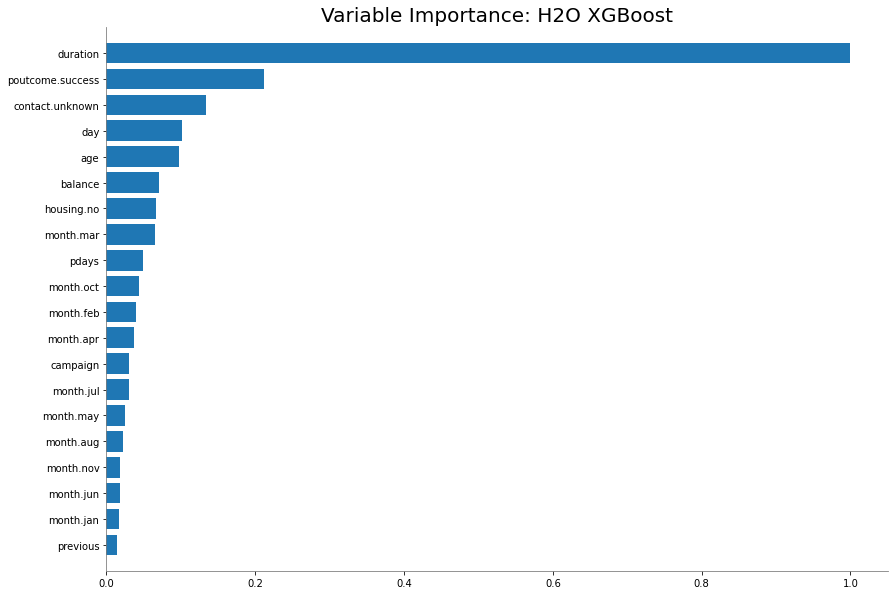

In [42]:
model1.varimp_plot(num_of_features=20)